# Reading Files With Pandas part 2 (HTML, API, and others)

In [2]:
# import library

import pandas as pd
import numpy as np

# Reading HTML files with pandas
Reading HTML files with read_html() function in pandas

In [3]:
# example html script
html_string = """
<table>
    <thead>
      <tr>
        <th>Order date</th>
        <th>Region</th> 
        <th>Item</th>
        <th>Units</th>
        <th>Unit cost</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>1/6/2018</td>
        <td>East</td> 
        <td>Pencil</td>
        <td>95</td>
        <td>1.99</td>
      </tr>
      <tr>
        <td>1/23/2018</td>
        <td>Central</td> 
        <td>Binder</td>
        <td>50</td>
        <td>19.99</td>
      </tr>
      <tr>
        <td>2/9/2018</td>
        <td>Central</td> 
        <td>Pencil</td>
        <td>36</td>
        <td>4.99</td>
      </tr>
      <tr>
        <td>3/15/2018</td>
        <td>West</td> 
        <td>Pen</td>
        <td>27</td>
        <td>19.99</td>
      </tr>
    </tbody>
</table>
"""

In [4]:
# assign to data frame with read_html() function
html_df = pd.read_html(html_string)

In [5]:
# return list value
html_df

[  Order date   Region    Item  Units  Unit cost
 0   1/6/2018     East  Pencil     95       1.99
 1  1/23/2018  Central  Binder     50      19.99
 2   2/9/2018  Central  Pencil     36       4.99
 3  3/15/2018     West     Pen     27      19.99]

In [6]:
type(html_df)

list

In [7]:
# change into pandas DataFrame
html_df = html_df[0]

In [8]:
html_df

,Order date,Region,Item,Units,Unit cost
0,1/6/2018,East,Pencil,95,1.99
1,1/23/2018,Central,Binder,50,19.99
2,2/9/2018,Central,Pencil,36,4.99
3,3/15/2018,West,Pen,27,19.99


In [9]:

type(html_df)

pandas.core.frame.DataFrame

In [10]:
html_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order date  4 non-null      object 
 1   Region      4 non-null      object 
 2   Item        4 non-null      object 
 3   Units       4 non-null      int64  
 4   Unit cost   4 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 176.0+ bytes


In [11]:
# write and save to csv file
path = 'data out/csv/html.csv'

html_df.to_csv(path, index=False)

# Parse data from html url

url used = https://www.basketball-reference.com/leagues/NBA_2019_per_game.html

In [12]:
url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'

In [13]:
nba_df = pd.read_html(url)

In [14]:
# return list value
type(nba_df)

list

In [15]:
nba_df

[      Rk        Player Pos Age   Tm   G  GS    MP   FG   FGA  ...   FT%  ORB  \
 0      1  Álex Abrines  SG  25  OKC  31   2  19.0  1.8   5.1  ...  .923  0.2   
 1      2    Quincy Acy  PF  28  PHO  10   0  12.3  0.4   1.8  ...  .700  0.3   
 2      3  Jaylen Adams  PG  22  ATL  34   1  12.6  1.1   3.2  ...  .778  0.3   
 3      4  Steven Adams   C  25  OKC  80  80  33.4  6.0  10.1  ...  .500  4.9   
 4      5   Bam Adebayo   C  21  MIA  82  28  23.3  3.4   5.9  ...  .735  2.0   
 ..   ...           ...  ..  ..  ...  ..  ..   ...  ...   ...  ...   ...  ...   
 729  528  Tyler Zeller   C  29  MEM   4   1  20.5  4.0   7.0  ...  .778  2.3   
 730  529    Ante Žižić   C  22  CLE  59  25  18.3  3.1   5.6  ...  .705  1.8   
 731  530   Ivica Zubac   C  21  TOT  59  37  17.6  3.6   6.4  ...  .802  1.9   
 732  530   Ivica Zubac   C  21  LAL  33  12  15.6  3.4   5.8  ...  .864  1.6   
 733  530   Ivica Zubac   C  21  LAC  26  25  20.2  3.8   7.2  ...  .733  2.3   
 
      DRB  TRB  AST  STL  

In [16]:
# change into pandas DataFrame
nba_df = nba_df[0]
nba_df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


In [17]:
nba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      734 non-null    object
 1   Player  734 non-null    object
 2   Pos     734 non-null    object
 3   Age     734 non-null    object
 4   Tm      734 non-null    object
 5   G       734 non-null    object
 6   GS      734 non-null    object
 7   MP      734 non-null    object
 8   FG      734 non-null    object
 9   FGA     734 non-null    object
 10  FG%     728 non-null    object
 11  3P      734 non-null    object
 12  3PA     734 non-null    object
 13  3P%     687 non-null    object
 14  2P      734 non-null    object
 15  2PA     734 non-null    object
 16  2P%     719 non-null    object
 17  eFG%    728 non-null    object
 18  FT      734 non-null    object
 19  FTA     734 non-null    object
 20  FT%     691 non-null    object
 21  ORB     734 non-null    object
 22  DRB     734 non-null    ob

In [18]:
nba_df.describe()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,734,734,734,734,734,734,734,734,734,734,...,691,734,734,734,734,734,734,734,734,734
unique,531,531,12,23,32,83,81,291,96,172,...,273,44,90,111,75,26,26,40,41,200
top,Rk,Player,SG,23,TOT,G,0,MP,FG,FGA,...,FT%,0.3,1.8,TRB,0.8,0.3,0.1,0.8,1.7,PTS
freq,26,26,176,75,86,26,199,26,26,26,...,26,81,26,26,40,93,121,59,46,26


# Parsing data frame with request method

url = https://en.wikipedia.org/wiki/The_Simpsons

In [19]:
# import library
import requests

url = 'https://en.wikipedia.org/wiki/The_Simpsons'

In [20]:
# make a request
req = requests.get(url)

wiki_table = pd.read_html(req.text, header=0)

In [21]:
wiki_table

ded byGrey's Anatomy2006]
 Index: [],
                 vteThe Simpsons  \
 0      The Simpsons (franchise)   
 1                    Characters   
 2   Simpson familyand relatives   
 3           Recurringcharacters   
 4                       History   
 5                    Production   
 6                      Episodes   
 7                       Seasons   
 8                     Hallmarks   
 9                        Themes   
 10                    Locations   
 11                        Films   
 12                  Other media   
 13                  Theme parks   
 14                Miscellaneous   
 15               Inspired works   
 16                      Related   
 17       Portal  Category  Book   
 
                                     vteThe Simpsons.1  
 0                            The Simpsons (franchise)  
 1   Simpson familyand relatives Homer Simpson Marg...  
 2   Homer Simpson Marge Simpson Bart Simpson Lisa ...  
 3   Sideshow Bob Kent Brockman Mr. Burns Comic 

In [22]:
wiki_table[1].head() # still not normalize

,Season,Season.1,No. ofepisodes,Originally aired,Originally aired.1,Originally aired.2,Viewership,Viewership.1,Viewership.2
0,Season,Season,No. ofepisodes,Season premiere,Season finale,Time Slot (ET),Avg. viewers(in millions),Most watched episode,Most watched episode
1,Season,Season,No. ofepisodes,Season premiere,Season finale,Time Slot (ET),Avg. viewers(in millions),Viewers(millions),Episode Title
2,1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 pm,27.8,33.5,"""Life on the Fast Lane"""
3,2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 pm,24.4,33.6,"""Bart Gets an F"""
4,3,1991–92,24,"September 19, 1991","August 27, 1992",Thursday 8:00 pm,21.8,25.5,"""Colonel Homer"""


In [23]:
simpsons_df = wiki_table[1]

In [24]:
simpsons_df.drop([0,1], inplace=True)
simpsons_df.head()

,Season,Season.1,No. ofepisodes,Originally aired,Originally aired.1,Originally aired.2,Viewership,Viewership.1,Viewership.2
2,1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 pm,27.8,33.5,"""Life on the Fast Lane"""
3,2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 pm,24.4,33.6,"""Bart Gets an F"""
4,3,1991–92,24,"September 19, 1991","August 27, 1992",Thursday 8:00 pm,21.8,25.5,"""Colonel Homer"""
5,4,1992–93,22,"September 24, 1992","May 13, 1993",Thursday 8:00 pm,22.4,28.6,"""Lisa's First Word"""
6,5,1993–94,22,"September 30, 1993","May 19, 1994",Thursday 8:00 pm,18.9,24.0,"""Treehouse of Horror IV"""


In [25]:
simpsons_df = simpsons_df.set_index('Season')
simpsons_df.head()

,Season.1,No. ofepisodes,Originally aired,Originally aired.1,Originally aired.2,Viewership,Viewership.1,Viewership.2
Season,,,,,,,,
1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 pm,27.8,33.5,"""Life on the Fast Lane"""
2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 pm,24.4,33.6,"""Bart Gets an F"""
3,1991–92,24,"September 19, 1991","August 27, 1992",Thursday 8:00 pm,21.8,25.5,"""Colonel Homer"""
4,1992–93,22,"September 24, 1992","May 13, 1993",Thursday 8:00 pm,22.4,28.6,"""Lisa's First Word"""
5,1993–94,22,"September 30, 1993","May 19, 1994",Thursday 8:00 pm,18.9,24.0,"""Treehouse of Horror IV"""


In [26]:
simpsons_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 1 to 32
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Season.1            32 non-null     object
 1   No. ofepisodes      32 non-null     object
 2   Originally aired    32 non-null     object
 3   Originally aired.1  32 non-null     object
 4   Originally aired.2  31 non-null     object
 5   Viewership          32 non-null     object
 6   Viewership.1        32 non-null     object
 7   Viewership.2        32 non-null     object
dtypes: object(8)
memory usage: 1.1+ KB


In [27]:
simpsons_df['No. ofepisodes'] = simpsons_df['No. ofepisodes'].str.replace('TBA',simpsons_df['No. ofepisodes'].min())
simpsons_df.tail()

,Season.1,No. ofepisodes,Originally aired,Originally aired.1,Originally aired.2,Viewership,Viewership.1,Viewership.2
Season,,,,,,,,
28,2016–17,22,"September 25, 2016","May 21, 2017",Sunday 8:00 pm,4.80[153],8.19,"""Pork and Burns"""
29,2017–18,21,"October 1, 2017","May 20, 2018",Sunday 8:00 pm,4.07[154],8.04,"""Frink Gets Testy"""
30,2018–19,23,"September 30, 2018","May 12, 2019",Sunday 8:00 pm,3.10[155],8.20,"""The Girl on the Bus"""
31,2019–20,22,"September 29, 2019","May 17, 2020",Sunday 8:00 pm,2.58[156],5.63,"""Go Big or Go Homer"""
32,2020–21,13,"September 27, 2020",TBA,NaN,TBA,TBA,TBA


# Parse data from .html file

In [28]:
html_path = 'data/html/fifa_players.html'

html_list = pd.read_html(html_path, encoding='utf-8')

In [29]:
type(html_list)

list

In [30]:
html_list[0]

,Unnamed: 0,Unnamed: 1,OVR-POT,Name,Preferred Positions,Age,Hits,Unnamed: 7
0,NaN,NaN,7587,Erling Braut Håland,ST,19,245,NaN
1,NaN,NaN,9393,Cristiano Ronaldo,STLW,34,185,NaN
2,NaN,NaN,9494,Lionel Messi,RWCFST,32,178,NaN
3,NaN,NaN,8995,Kylian Mbappé,STRW,20,137,NaN
4,NaN,NaN,8492,Jadon Sancho,RMLM,19,125,NaN
5,NaN,NaN,9292,Neymar Jr,LWCAM,27,118,NaN
6,NaN,NaN,8692,Frenkie de Jong,CMCDM,22,93,NaN
7,NaN,NaN,8892,Paulo Dybala,CAMRW,25,91,NaN
8,NaN,NaN,8187,Donny van de Beek,CAMCM,22,90,NaN
9,NaN,NaN,7685,Tammy Abraham,ST,22,85,NaN


In [31]:
fifa_df = html_list[0]
fifa_df.head()

,Unnamed: 0,Unnamed: 1,OVR-POT,Name,Preferred Positions,Age,Hits,Unnamed: 7
0,NaN,NaN,7587,Erling Braut Håland,ST,19,245,NaN
1,NaN,NaN,9393,Cristiano Ronaldo,STLW,34,185,NaN
2,NaN,NaN,9494,Lionel Messi,RWCFST,32,178,NaN
3,NaN,NaN,8995,Kylian Mbappé,STRW,20,137,NaN
4,NaN,NaN,8492,Jadon Sancho,RMLM,19,125,NaN


In [32]:
# normalize
fifa_df = fifa_df.iloc[:, 2:-1]
fifa_df.head()

,OVR-POT,Name,Preferred Positions,Age,Hits
0,7587,Erling Braut Håland,ST,19,245
1,9393,Cristiano Ronaldo,STLW,34,185
2,9494,Lionel Messi,RWCFST,32,178
3,8995,Kylian Mbappé,STRW,20,137
4,8492,Jadon Sancho,RMLM,19,125


In [33]:
fifa_df.set_index('Name', inplace=True)
fifa_df.head()

,OVR-POT,Preferred Positions,Age,Hits
Name,,,,
Erling Braut Håland,7587,ST,19,245
Cristiano Ronaldo,9393,STLW,34,185
Lionel Messi,9494,RWCFST,32,178
Kylian Mbappé,8995,STRW,20,137
Jadon Sancho,8492,RMLM,19,125


In [34]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Erling Braut  Håland to Takefusa KuboL
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   OVR-POT              30 non-null     int64 
 1   Preferred Positions  30 non-null     object
 2   Age                  30 non-null     int64 
 3   Hits                 30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 960.0+ bytes


In [35]:
# most hits player
fifa_df.sort_values('Hits', ascending=False)

,OVR-POT,Preferred Positions,Age,Hits
Name,,,,
Erling Braut Håland,7587,ST,19,245
Cristiano Ronaldo,9393,STLW,34,185
Lionel Messi,9494,RWCFST,32,178
Kylian Mbappé,8995,STRW,20,137
Jadon Sancho,8492,RMLM,19,125
Neymar Jr,9292,LWCAM,27,118
Frenkie de Jong,8692,CMCDM,22,93
Paulo Dybala,8892,CAMRW,25,91
Donny van de Beek,8187,CAMCM,22,90


# Fetch data from REST API

API used = http://api.citybik.es/v2/networks

In [36]:
# import library
import requests

api = 'http://api.citybik.es/v2/networks'

In [37]:
req = requests.get(api)

In [38]:
req.status_code

200

In [40]:
# change request data into json
json_dict = req.json()

In [45]:
citybikes_df = pd.DataFrame.from_dict(json_dict['networks'])
citybikes_df.head()

,company,href,id,location,name,source,gbfs_href,license
0,[ЗАО «СитиБайк»],/v2/networks/velobike-moscow,velobike-moscow,"{'city': 'Moscow', 'country': 'RU', 'latitude'...",Velobike,NaN,NaN,NaN
1,[Gobike A/S],/v2/networks/bycyklen,bycyklen,"{'city': 'Copenhagen', 'country': 'DK', 'latit...",Bycyklen,NaN,NaN,NaN
2,[Gobike A/S],/v2/networks/nu-connect,nu-connect,"{'city': 'Utrecht', 'country': 'NL', 'latitude...",Nu-Connect,NaN,NaN,NaN
3,[Urban Infrastructure Partner],/v2/networks/baerum-bysykkel,baerum-bysykkel,"{'city': 'Bærum', 'country': 'NO', 'latitude':...",Bysykkel,NaN,NaN,NaN
4,[Gobike A/S],/v2/networks/bysykkelen,bysykkelen,"{'city': 'Stavanger', 'country': 'NO', 'latitu...",Bysykkelen,NaN,NaN,NaN


In [46]:
# unpacking location column by normalizing json
# import library
from pandas.io.json import json_normalize
citybikes_df = json_normalize(json_dict['networks'], sep='_')

In [47]:
citybikes_df.head()

,company,href,id,name,location_city,location_country,location_latitude,location_longitude,source,gbfs_href,license_name,license_url
0,[ЗАО «СитиБайк»],/v2/networks/velobike-moscow,velobike-moscow,Velobike,Moscow,RU,55.750000,37.616667,NaN,NaN,NaN,NaN
1,[Gobike A/S],/v2/networks/bycyklen,bycyklen,Bycyklen,Copenhagen,DK,55.673582,12.564984,NaN,NaN,NaN,NaN
2,[Gobike A/S],/v2/networks/nu-connect,nu-connect,Nu-Connect,Utrecht,NL,52.117000,5.067000,NaN,NaN,NaN,NaN
3,[Urban Infrastructure Partner],/v2/networks/baerum-bysykkel,baerum-bysykkel,Bysykkel,Bærum,NO,59.894550,10.546343,NaN,NaN,NaN,NaN
4,[Gobike A/S],/v2/networks/bysykkelen,bysykkelen,Bysykkelen,Stavanger,NO,58.969975,5.733107,NaN,NaN,NaN,NaN


In [48]:
citybikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company             641 non-null    object 
 1   href                645 non-null    object 
 2   id                  645 non-null    object 
 3   name                645 non-null    object 
 4   location_city       645 non-null    object 
 5   location_country    645 non-null    object 
 6   location_latitude   645 non-null    float64
 7   location_longitude  645 non-null    float64
 8   source              159 non-null    object 
 9   gbfs_href           66 non-null     object 
 10  license_name        29 non-null     object 
 11  license_url         29 non-null     object 
dtypes: float64(2), object(10)
memory usage: 35.3+ KB


In [50]:
# write to csv and json file
csv_path = 'data out/csv/citybikes.csv'
json_path = 'data out/json/citybikes.json'

citybikes_df.to_csv(csv_path)
citybikes_df.to_json(json_path)

# Import data from other files (.dta .sas7bdat)


In [51]:
# import data from sas file using read_sas() function
path = 'data/others/airline.sas7bdat'

df = pd.read_sas(path)
df.head()

,YEAR,Y,W,R,L,K
0,1948.0,1.214,0.243,0.1454,1.415,0.612
1,1949.0,1.354,0.260,0.2181,1.384,0.559
2,1950.0,1.569,0.278,0.3157,1.388,0.573
3,1951.0,1.948,0.297,0.3940,1.550,0.564
4,1952.0,2.265,0.310,0.3559,1.802,0.574


In [56]:
df.set_index('YEAR', inplace=True)

In [57]:
df.head()

,Y,W,R,L,K
YEAR,,,,,
1948.0,1.214,0.243,0.1454,1.415,0.612
1949.0,1.354,0.260,0.2181,1.384,0.559
1950.0,1.569,0.278,0.3157,1.388,0.573
1951.0,1.948,0.297,0.3940,1.550,0.564
1952.0,2.265,0.310,0.3559,1.802,0.574


<AxesSubplot:title={'center':'Airline'}, xlabel='YEAR'>

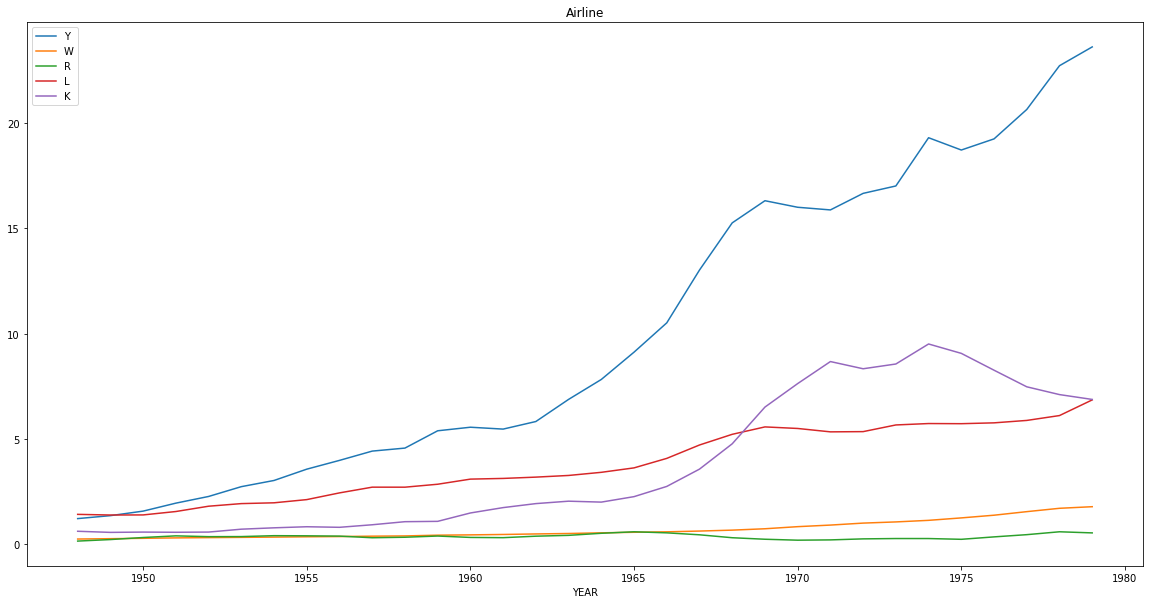

In [62]:
df.name = 'Airline'

df.plot(figsize=(20,10), title='Airline')


In [63]:
# import data from dta file using read_stata() function
path = 'data/others/broiler.dta'

df = pd.read_stata(path)

In [64]:
df.head()

,year,q,y,pchick,pbeef,pcor,pf,cpi,qproda,pop,meatex,time
0,1950.0,14.3,7863.0,69.500000,31.200001,59.799999,NaN,24.100000,2628500.0,151.684006,NaN,41.0
1,1951.0,15.1,7953.0,72.900002,36.500000,72.099998,NaN,26.000000,2843000.0,154.287003,NaN,42.0
2,1952.0,15.3,8071.0,73.099998,36.200001,71.300003,NaN,26.500000,2851200.0,156.953995,NaN,43.0
3,1953.0,15.2,8319.0,71.300003,28.500000,62.700001,NaN,26.700001,2953900.0,159.565002,NaN,44.0
4,1954.0,15.8,8276.0,64.400002,27.400000,63.400002,NaN,26.900000,3099700.0,162.391006,NaN,45.0


In [65]:
df.set_index('year', inplace=True)
df.head()

,q,y,pchick,pbeef,pcor,pf,cpi,qproda,pop,meatex,time
year,,,,,,,,,,,
1950.0,14.3,7863.0,69.500000,31.200001,59.799999,NaN,24.100000,2628500.0,151.684006,NaN,41.0
1951.0,15.1,7953.0,72.900002,36.500000,72.099998,NaN,26.000000,2843000.0,154.287003,NaN,42.0
1952.0,15.3,8071.0,73.099998,36.200001,71.300003,NaN,26.500000,2851200.0,156.953995,NaN,43.0
1953.0,15.2,8319.0,71.300003,28.500000,62.700001,NaN,26.700001,2953900.0,159.565002,NaN,44.0
1954.0,15.8,8276.0,64.400002,27.400000,63.400002,NaN,26.900000,3099700.0,162.391006,NaN,45.0


array([[<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
        <AxesSubplot:xlabel='year'>],
       [<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
        <AxesSubplot:xlabel='year'>],
       [<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
        <AxesSubplot:xlabel='year'>],
       [<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
        <AxesSubplot:xlabel='year'>],
       [<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
        <AxesSubplot:xlabel='year'>]], dtype=object)

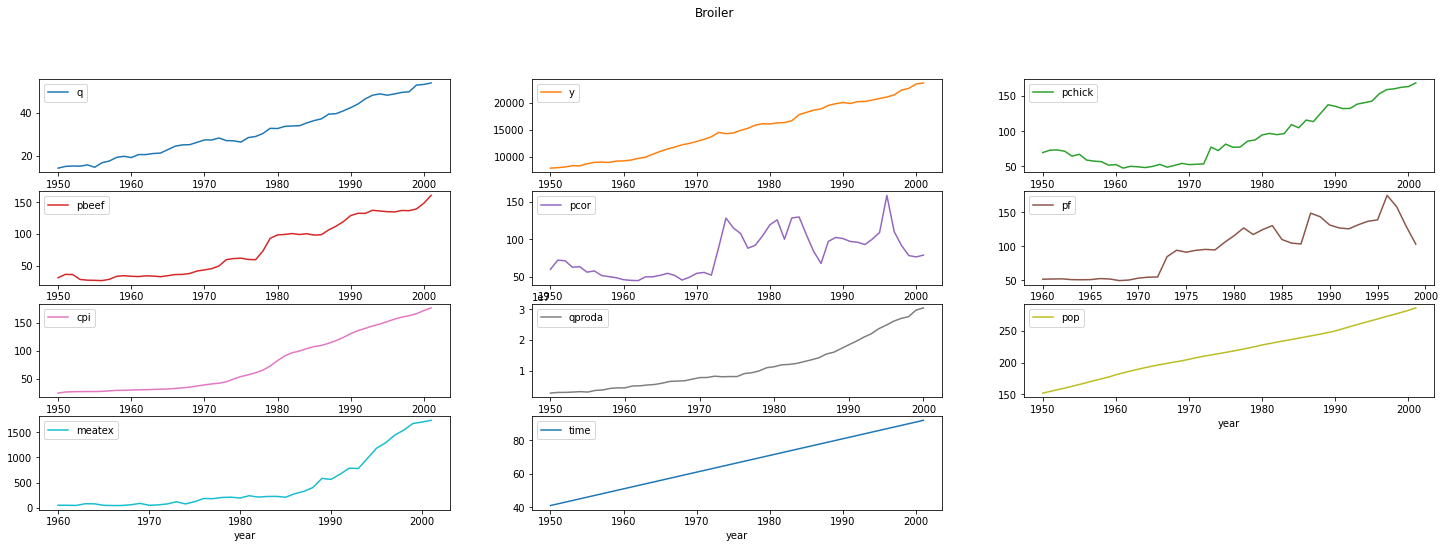

In [78]:
df.plot(figsize=(25,10), title='Broiler', subplots=True, sharex=False, layout=(5,3))
